1. Setting up Python and Importing Data

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import plotly.express as px

In [16]:
# Import all the CSV files (US, CA, DE, GB, FR, IN, JP, KR, MX, RU, BR)
files = [i for i in glob.glob('/Users/{Username}/Desktop/Data/2023/*.{}'.format('csv'))]
sorted(files)

['2023/BR_youtube_trending_data.csv',
 '2023/CA_youtube_trending_data.csv',
 '2023/DE_youtube_trending_data.csv',
 '2023/FR_youtube_trending_data.csv',
 '2023/GB_youtube_trending_data.csv',
 '2023/IN_youtube_trending_data.csv',
 '2023/JP_youtube_trending_data.csv',
 '2023/KR_youtube_trending_data.csv',
 '2023/MX_youtube_trending_data.csv',
 '2023/RU_youtube_trending_data.csv',
 '2023/US_youtube_trending_data.csv']

In [4]:
# add country column
dfs = list()
for csv in files:
    df = pd.read_csv(csv,index_col='video_id', encoding="ISO-8859-1")
    df['country'] = csv[5:7]
    dfs.append(df)
video_df = pd.concat(dfs)
video_df.head(3)

title  \
video_id                                                         
KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands â â...   

                      publishedAt                 channelId    channelTitle  \
video_id                                                                      
KX06ksuS6Xo  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg  Diljit Dosanjh   
J78aPJ3VyNs  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g   jacksepticeye   
M9Pmf9AB4Mo  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A    Apex Legends   

             categoryId         trending_date  \
video_id                                        
KX06ksuS6Xo          10  2020-08-12T00:00:00Z   
J78aPJ3VyNs          24  2020-08-12T00:00:00Z   
M9Pmf9AB4Mo          20  2020-08-12T00:00:00Z   

                                                          tags  view_count  \
video_id                                                                     
KX06ksuS6Xo  clash diljit dosanjh|diljit dosanjh|diljit dos...     9140911   
J78aPJ3VyNs  jacksepticeye|funny|funny meme|memes|jacksepti...     2038853   
M9Pmf9AB4Mo  Apex Legends|Apex Legends characters|new Apex ...     2381688   

              likes  dislikes  comment_count  \
video_id                                       
KX06ksuS6Xo  296541      6180          30059   
J78aPJ3VyNs  353797      2628          40222   
M9Pmf9AB4Mo  146740      2794          16549   

                                             thumbnail_link  \
video_id                                                      
KX06ksuS6Xo  https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg   
J78aPJ3VyNs  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg   
M9Pmf9AB4Mo  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg   

             comments_disabled  ratings_disabled  \
video_id                                           
KX06ksuS6Xo              False             False   
J78aPJ3VyNs              False             False   
M9Pmf9AB4Mo              False             False   

                                                   description country  
video_id                                                                
KX06ksuS6Xo  CLASH official music video performed by DILJIT...      CA  
J78aPJ3VyNs  I left youtube for a month and this is what ha...      CA  
M9Pmf9AB4Mo  While running her own modding shop, Ramya Pare...      CA

Data Cleaning and Feature Engineering 

In [5]:
#filling in empty spaces in the description column
video_df['description'] = video_df['description'].apply(lambda x: '' if pd.isnull(x)  else x)

video_df['trending_date'] = pd.to_datetime(video_df['trending_date'], errors='coerce', format='%Y-%m-%dT%H:%M:%SZ')
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'], errors='coerce', format='%Y-%m-%dT%H:%M:%SZ')

video_df = video_df.dropna(how='any',inplace=False, axis = 0)
video_df.insert(4, 'publish_date', video_df['publishedAt'].dt.date)
video_df['publishedAt'] = video_df['publishedAt'].dt.time

video_df = video_df[video_df.index != '#NAME?']

# full set of combined data, keep for later use
df_full = video_df.reset_index().sort_values('trending_date').set_index('video_id')
# which only keep the last entry if duplicated because it carries latest stat)
video_df = video_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
df_full.tail()

title publishedAt  \
video_id                                                                     
OrxH_13SrQg  æ­»å ã¯åºè¡æ§ã·ã§ãã¯ãéºä½ã¯ï¼ï...    05:18:12   
Nddp-ZlKZtI  ã  #ãã­ã©ã¤ãå¤§éåä¼2023 ãç§ã...    13:07:40   
gMq5PEbdpr4  [4K] ì¸ë¸í´(SEVENTEEN) âìì
ì ì (God...    08:00:12   
g1iobmNmmpc  ãæ°¸ä¹
ä¿å­çããããã©ã§ãããã...    10:00:34   
nXr-DvvDp38              HARRY POTTER : QUE SONT-ILS DEVENUS ?    10:00:38   

                            channelId                          channelTitle  \
video_id                                                                      
OrxH_13SrQg  UCSWOnDD1KIriGmyQ7SgNA4A              HTBåæµ·éãã¥ã¼ã¹   
Nddp-ZlKZtI  UC-hM6YJuNYVAmUWxeIr9FeA              Miko Ch. ãããã¿ã   
gMq5PEbdpr4  UCB9e3pof1o83aa0kkaoeJGA                             it's Live   
g1iobmNmmpc  UC_226ocwA3qmdpY2umXy9bA  ã³ã¹ã¡ã²ã¿ã¡ããã­ããµã©   
nXr-DvvDp38  UCGWoTWsXJi1UtCjOiBHIsfw                                Sofyan   

            publish_date  categoryId trending_date  \
video_id                                             
OrxH_13SrQg   2023-11-05          25    2023-11-13   
Nddp-ZlKZtI   2023-11-04          20    2023-11-13   
gMq5PEbdpr4   2023-11-04          24    2023-11-13   
g1iobmNmmpc   2023-11-05          26    2023-11-13   
nXr-DvvDp38   2023-11-05          24    2023-11-13   

                                                          tags  view_count  \
video_id                                                                     
OrxH_13SrQg  åæµ·é|ãã¥ã¼ã¹|HTB|åæµ·éãã¬ã|...      341778   
Nddp-ZlKZtI  ãããã¿ã|VTuber|ãã¼ãã£ã«YouTuber...      787891   
gMq5PEbdpr4  ì¸ë¸í´|SEVENTEEN|ìì
ì ì |God of Music...     2024448   
g1iobmNmmpc  ã¹ã¦ã©ãã|ã¬ãã¥ã¼|ã³ã¹ã¡|ã¡ã¤ã...      374951   
nXr-DvvDp38  film|sofian|sofiane|cinÃ©ma|cinema|harry potte...      798536   

              likes  dislikes  comment_count  \
video_id                                       
OrxH_13SrQg    1204         0            896   
Nddp-ZlKZtI   35009         0            319   
gMq5PEbdpr4  179463         0           3662   
g1iobmNmmpc   11582         0            485   
nXr-DvvDp38   59493         0            793   

                                             thumbnail_link  \
video_id                                                      
OrxH_13SrQg  https://i.ytimg.com/vi/OrxH_13SrQg/default.jpg   
Nddp-ZlKZtI  https://i.ytimg.com/vi/Nddp-ZlKZtI/default.jpg   
gMq5PEbdpr4  https://i.ytimg.com/vi/gMq5PEbdpr4/default.jpg   
g1iobmNmmpc  https://i.ytimg.com/vi/g1iobmNmmpc/default.jpg   
nXr-DvvDp38  https://i.ytimg.com/vi/nXr-DvvDp38/default.jpg   

             comments_disabled  ratings_disabled  \
video_id                                           
OrxH_13SrQg              False             False   
Nddp-ZlKZtI              False             False   
gMq5PEbdpr4              False             False   
g1iobmNmmpc              False             False   
nXr-DvvDp38              False             False   

                                                   description country  
video_id                                                                
OrxH_13SrQg  éåã®ç¦å³¶çºã®å¤§åè»å²³ã§è¦ã¤ãã...      JP  
Nddp-ZlKZtI  HASHTAGð³ #ãã­ã©ã¤ãå¤§éåä¼2023 ä...      JP  
gMq5PEbdpr4  ìì¸ ë¼ì´ë¸ë¥¼ ì°¾ìì¨ ì¸ë¸í´ (SEVENT...      JP  
g1iobmNmmpc  ä»åã¯ãªãã¨å°ç°åãã­ããã¨ã®ã...      JP  
nXr-DvvDp38  Tout le casting de Harry Potter, 22 ans plus t...      FR

In [6]:
# Insert category column
video_df['categoryId'] = video_df['categoryId'].astype(str)
df_full['categoryId'] = video_df['categoryId'].astype(str)

category_id = {}
# every country category_id files are same
with open('1718/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

video_df.insert(4, 'category', video_df['categoryId'].map(category_id))
df_full.insert(4, 'category', df_full['categoryId'].map(category_id))
category_list = video_df['category'].unique()
category_list

array(['Autos & Vehicles', 'Entertainment', 'Music', 'Howto & Style',
       'People & Blogs', 'Sports', 'Education', 'Film & Animation',
       'Science & Technology', 'Gaming', 'News & Politics', 'Comedy',
       'Pets & Animals', 'Travel & Events', 'Nonprofits & Activism'],
      dtype=object)

# Q1. What is the time range of the data?

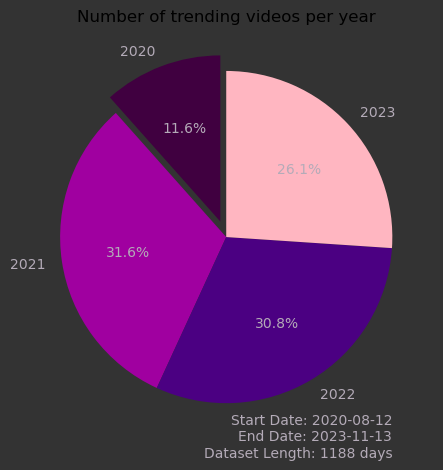

In [7]:
##which years do we have data for?
year_counts = df_full['trending_date'].apply(lambda x: x.year).value_counts().sort_index()
fig, ax = plt.subplots()

# Plot
ax.pie(year_counts,autopct='%1.1f%%', startangle=90, labels = [2020,2021,2022,2023],colors=['#400040', '#A000A0', '#4B0082','#FFB6C1'], explode=(0.1, 0, 0,0),textprops={'color':'#b4abb8'})
ax.set_title('Number of trending videos per year')
fig.set_facecolor('#333333')
# Adding annotations for the start and end dates
start_date = df_full['trending_date'].min().strftime('%Y-%m-%d')
end_date = df_full['trending_date'].max().strftime('%Y-%m-%d')
diff_days = (pd.to_datetime(end_date)-pd.to_datetime(start_date)).days

ax.text(1, -1.1, f'Start Date: {start_date}', ha='right', va='center', fontsize=10, color='#b4abb8')
ax.text(1, -1.2, f'End Date: {end_date}', ha='right', va='center', fontsize=10, color='#b4abb8')
ax.text(1, -1.3, f'Dataset Length: {diff_days} days',ha='right', va='center', fontsize=10, color='#b4abb8')
plt.tight_layout()
plt.show()

# Q2. Are there gaps in the data?

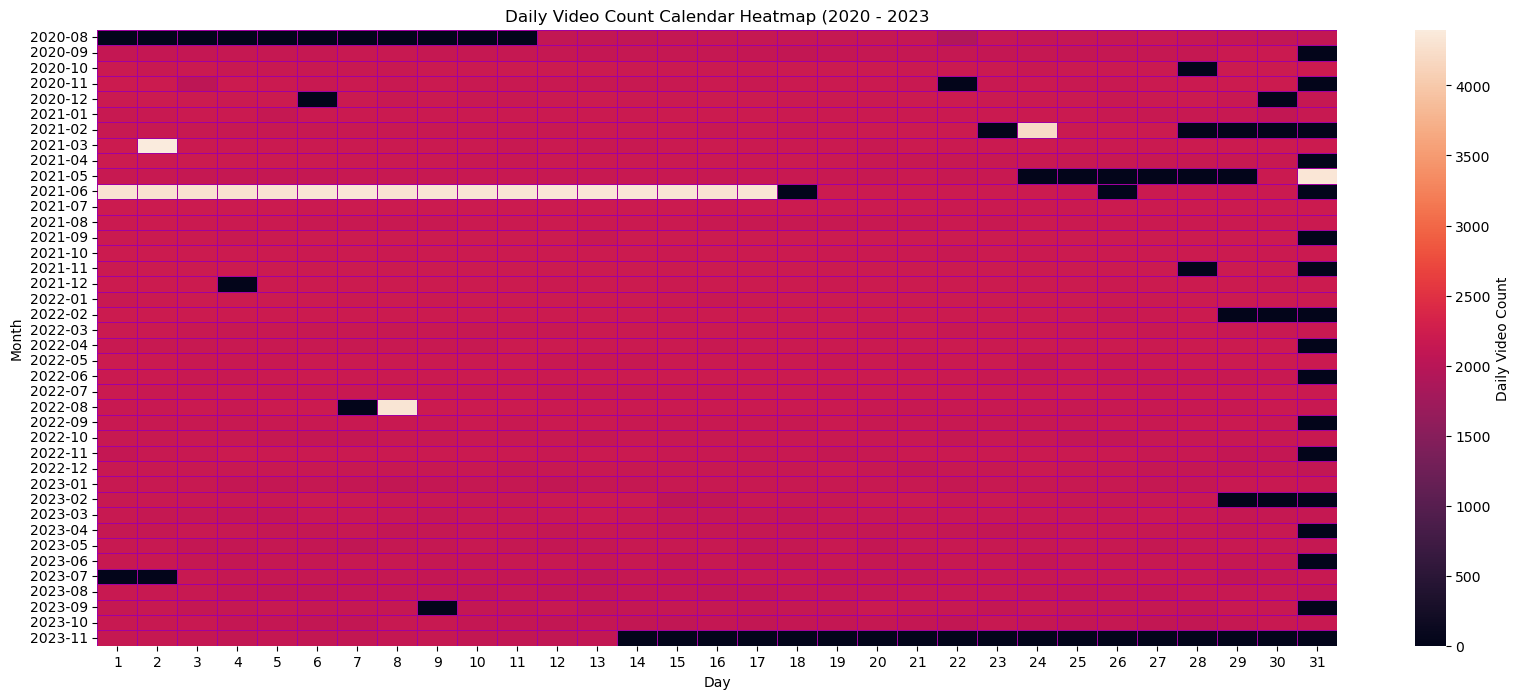

In [8]:
# Complete the date range for missing dates and fill NaN where there's no data
all_dates = pd.date_range(start="2020-08-12", end="2023-11-13")
series_data = df_full.groupby('trending_date').size()
series_data = series_data.reindex(all_dates).fillna(0)

# Reshape the data for the heatmap
df_heatmap = series_data.reset_index()
df_heatmap['month'] = df_heatmap['index'].dt.strftime('%Y-%m')
df_heatmap['day'] = df_heatmap['index'].dt.day

heatmap_data = df_heatmap.pivot_table(values=0, index='month', columns='day', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cbar_kws={'label': 'Daily Video Count'},linewidths=.5,linecolor='#A000A0')
ax.set_title('Daily Video Count')
cbar = ax.collections[0].colorbar
cbar.set_label(label= 'Daily Video Count')
ax.set_xlabel('Day')
ax.set_ylabel('Month')
ax.set_title('Daily Video Count Calendar Heatmap (2020 - 2023')
plt.show()

Each countries gap: US, CA, DE, GB, FR, IN, JP, KR, MX, RU, BR

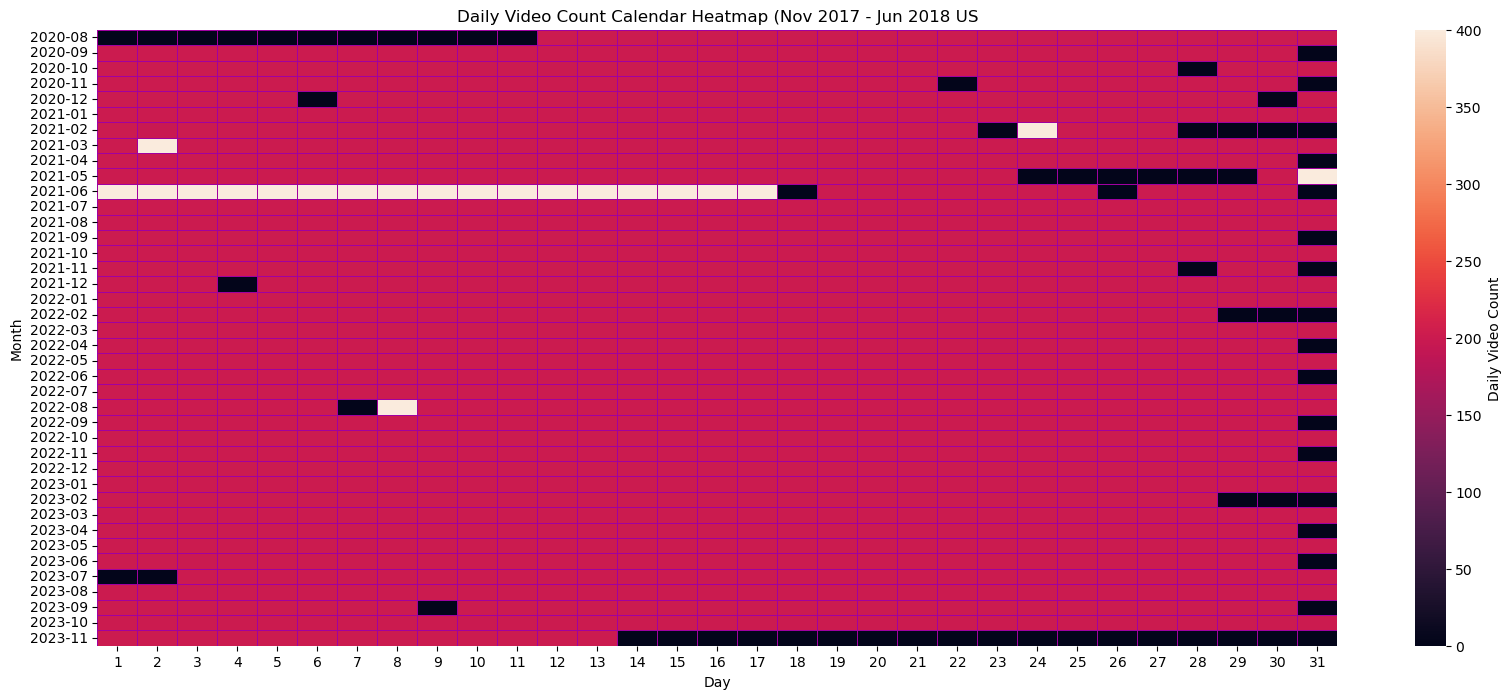

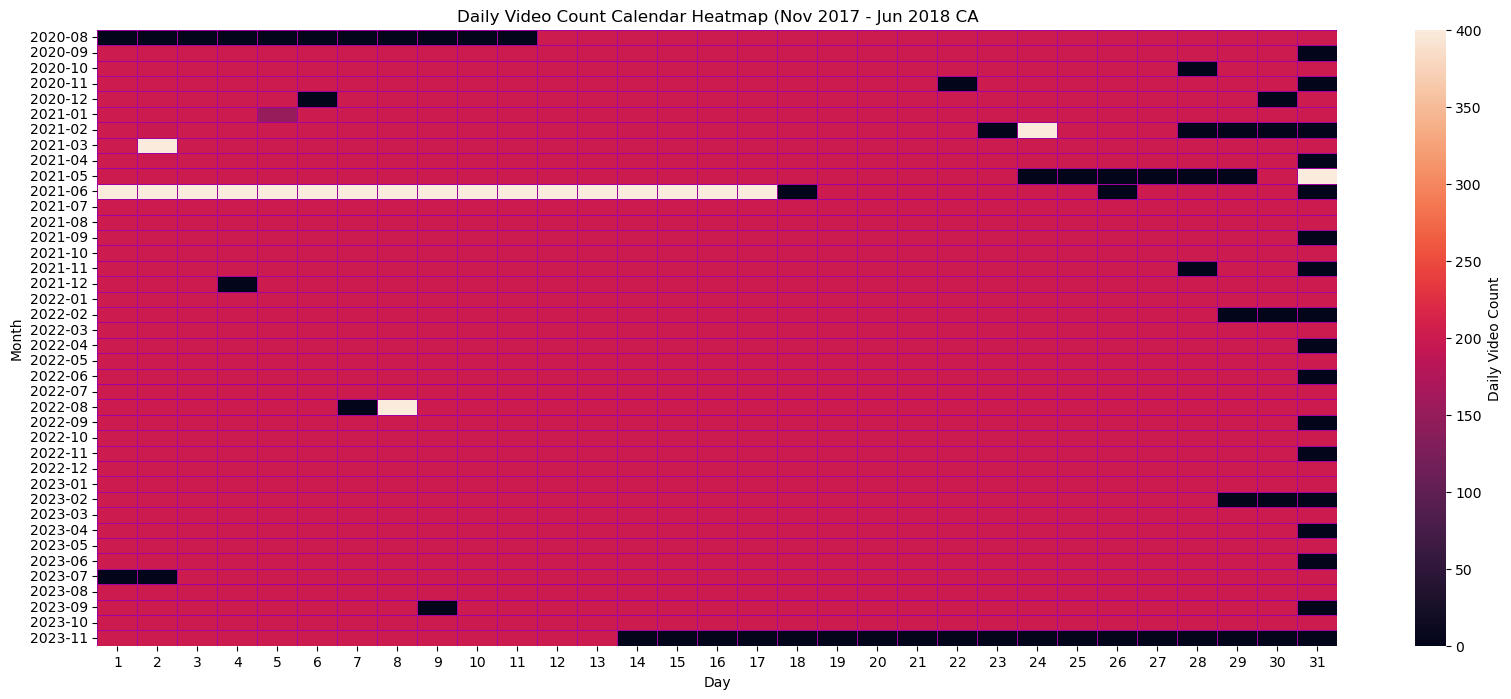

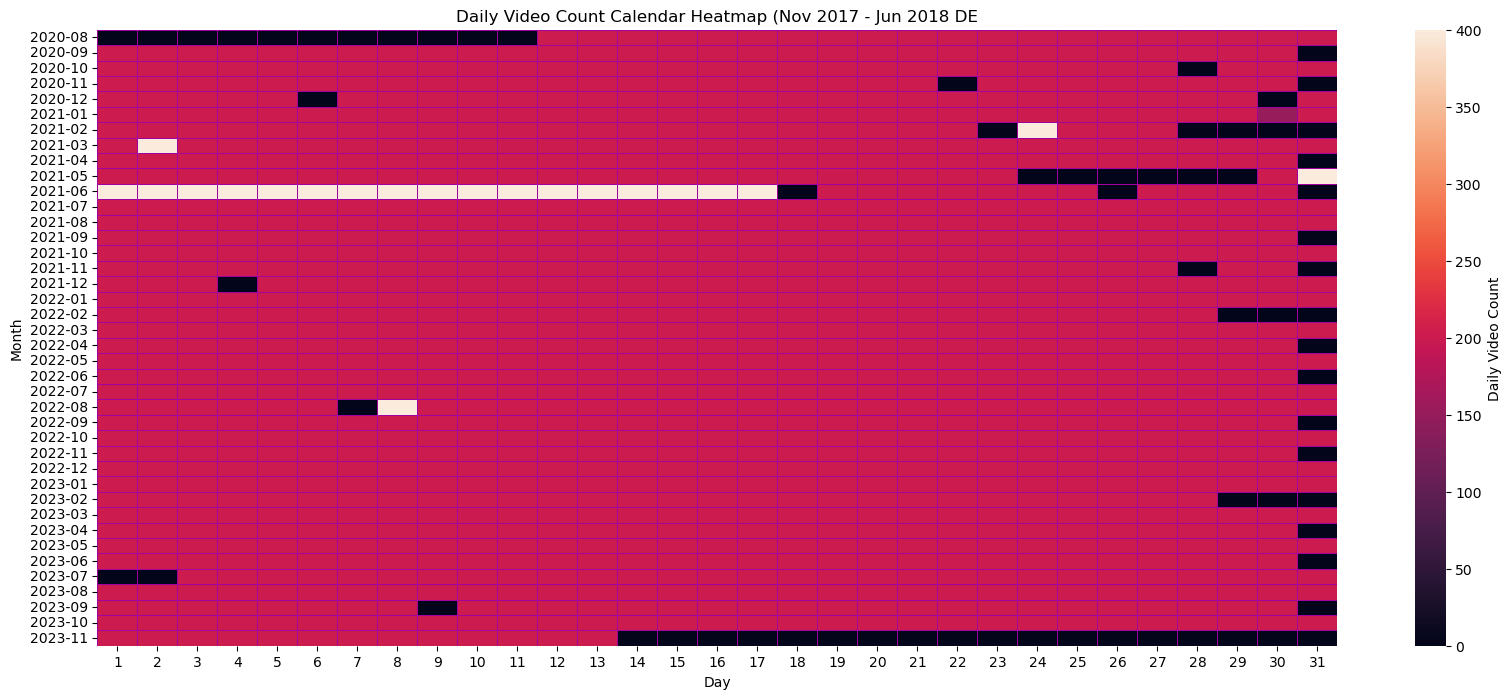

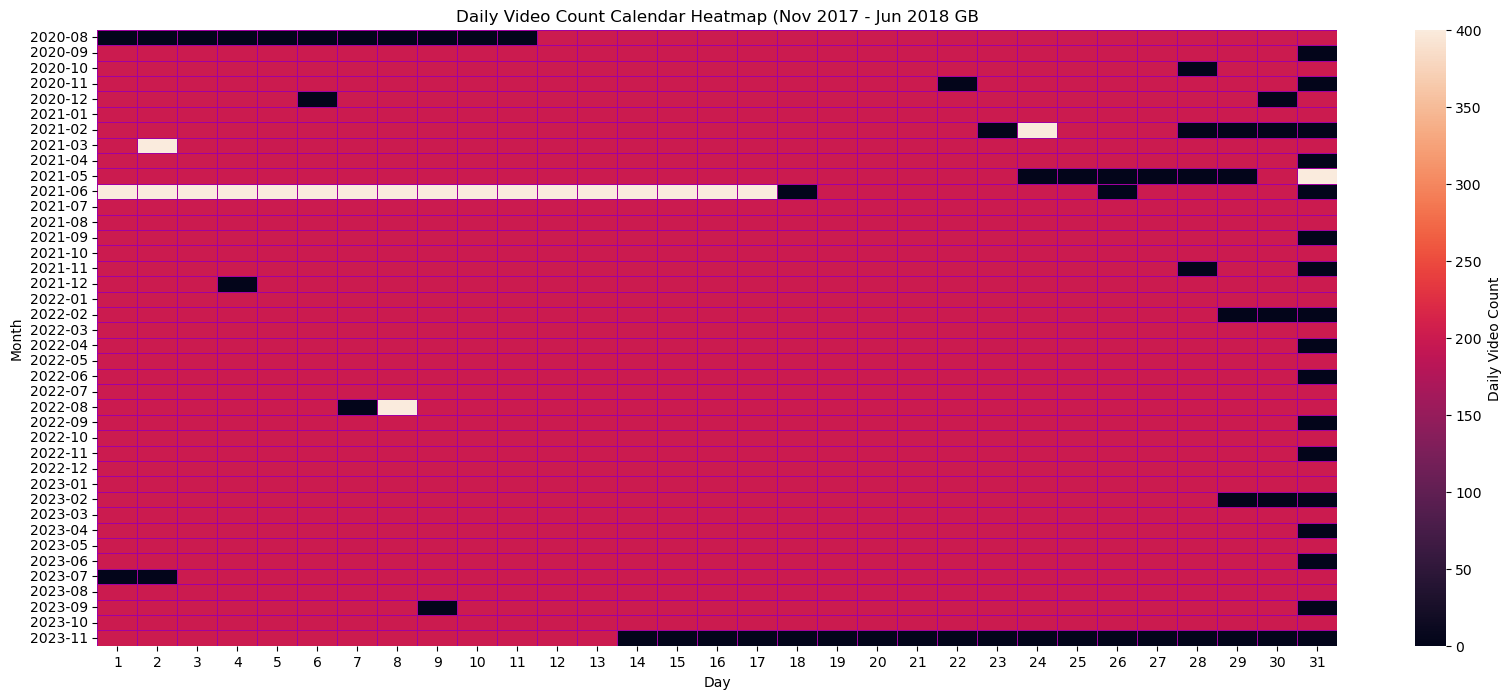

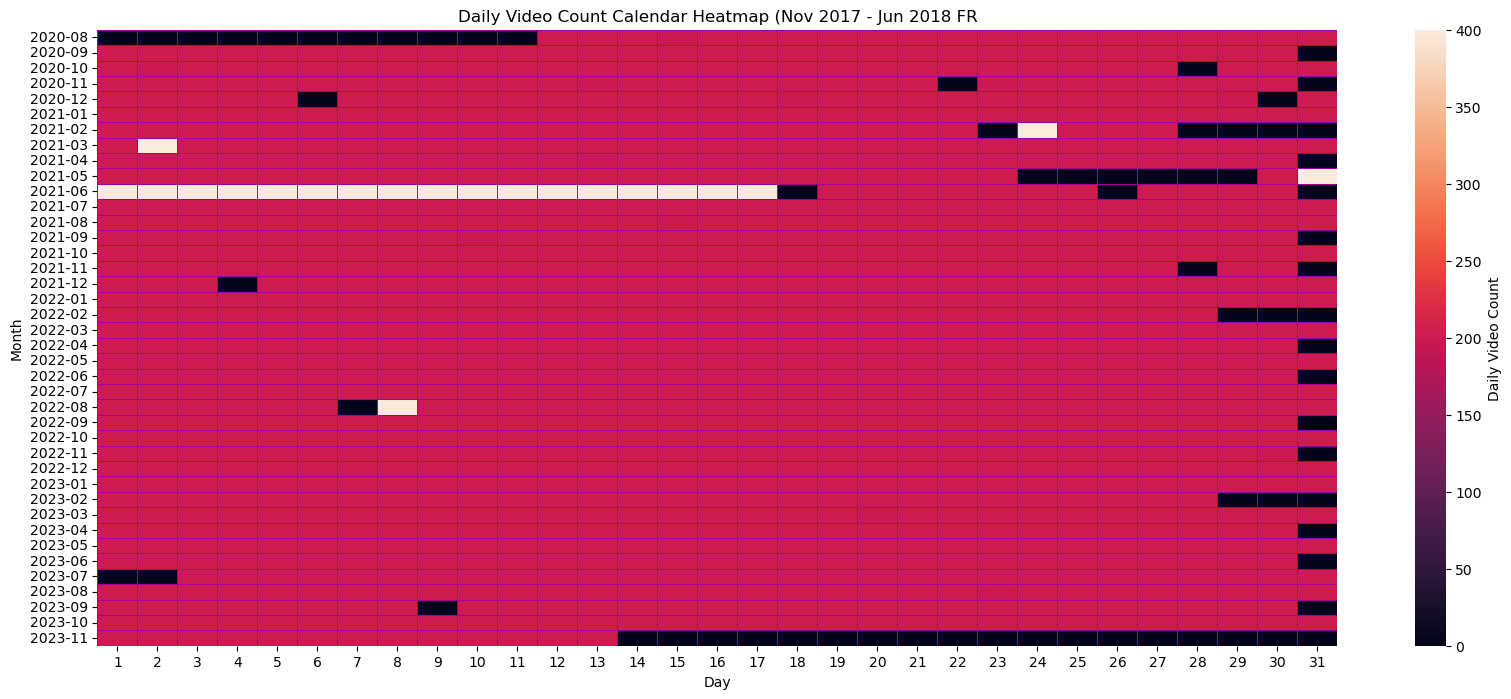

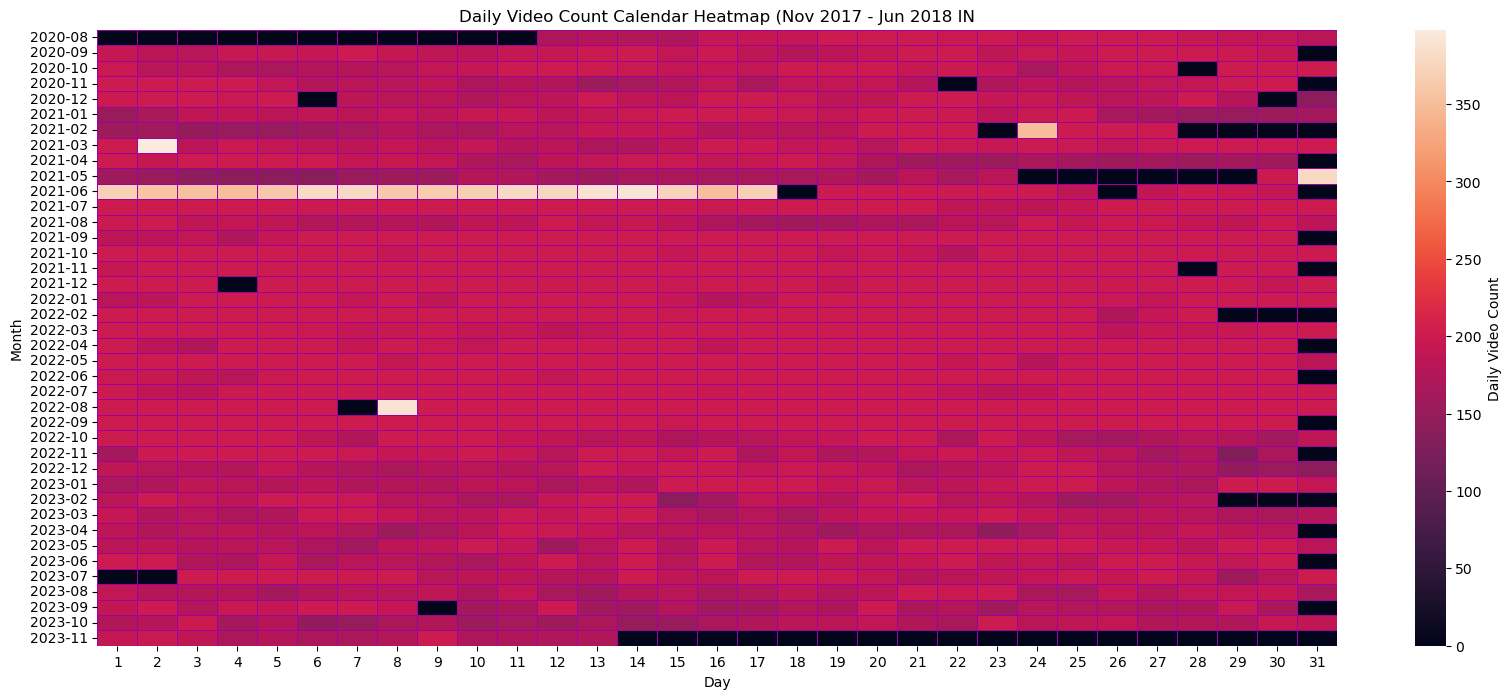

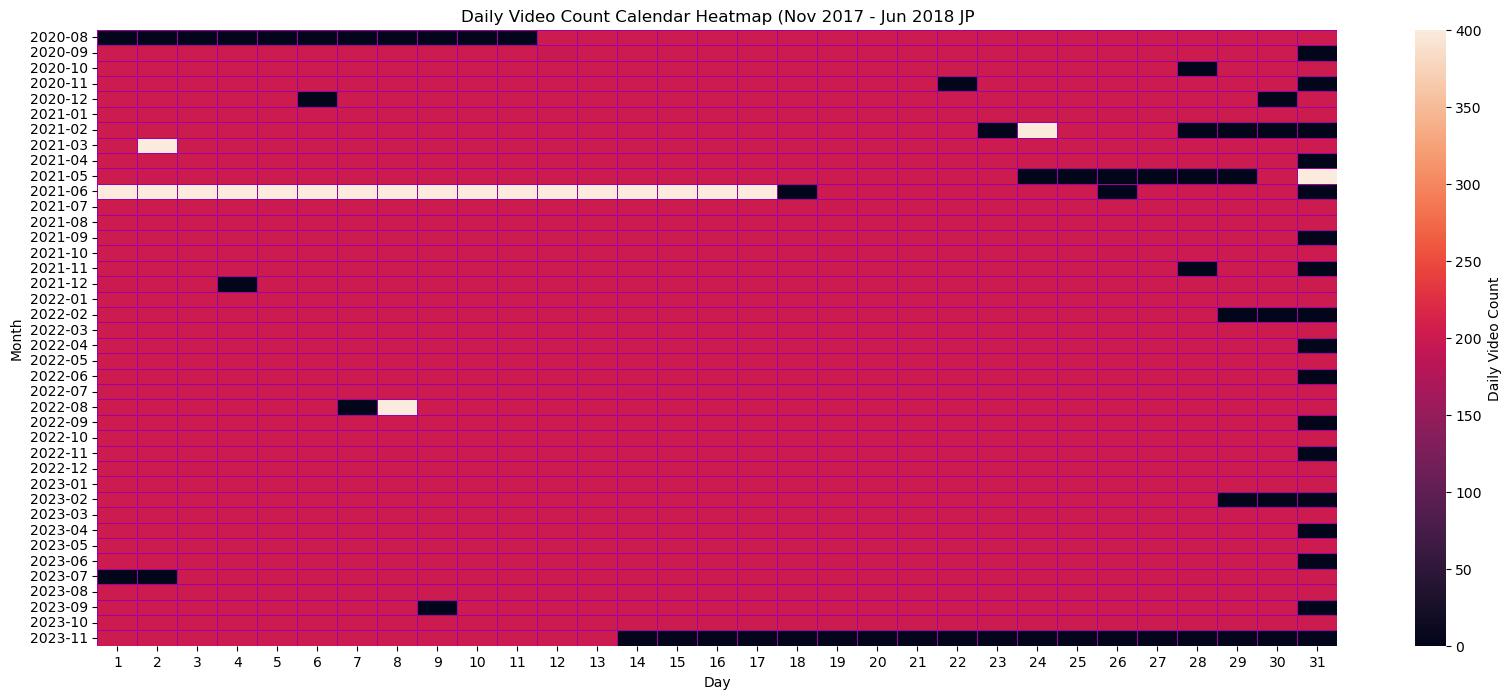

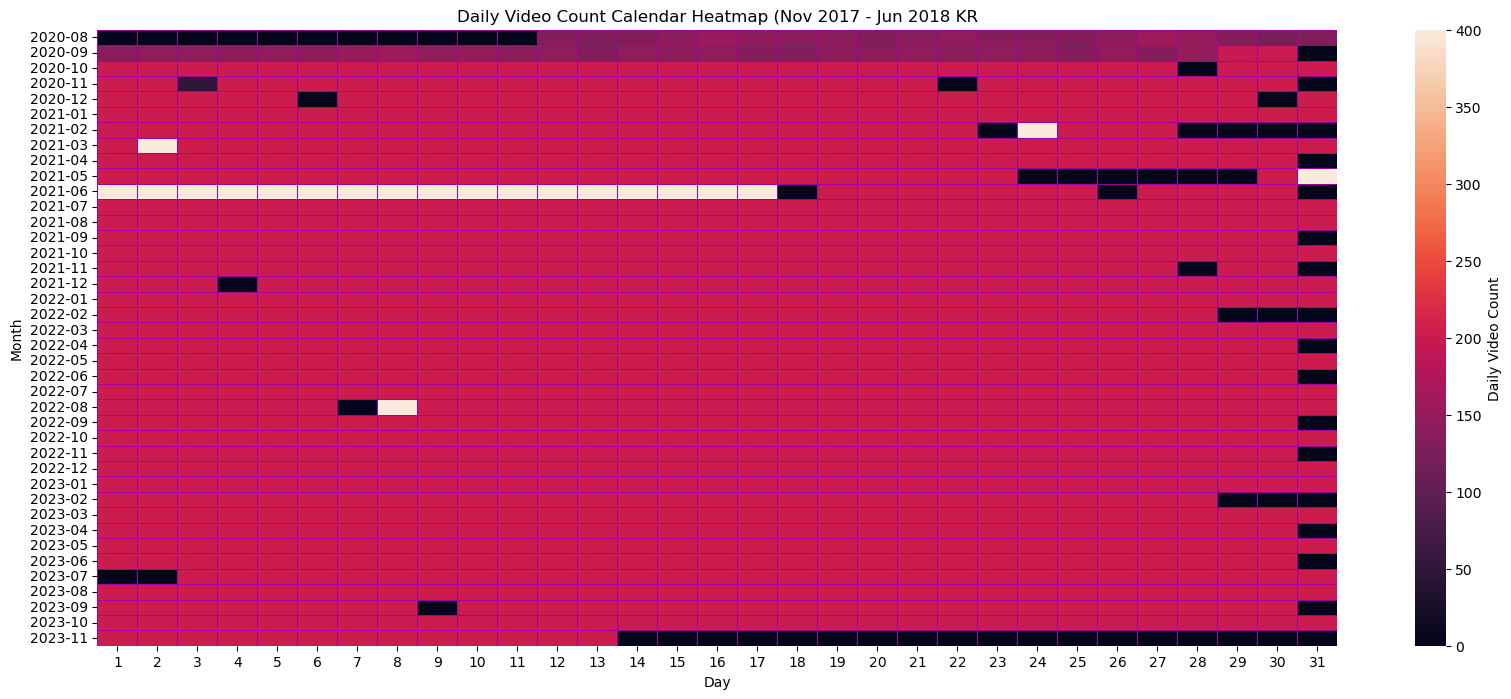

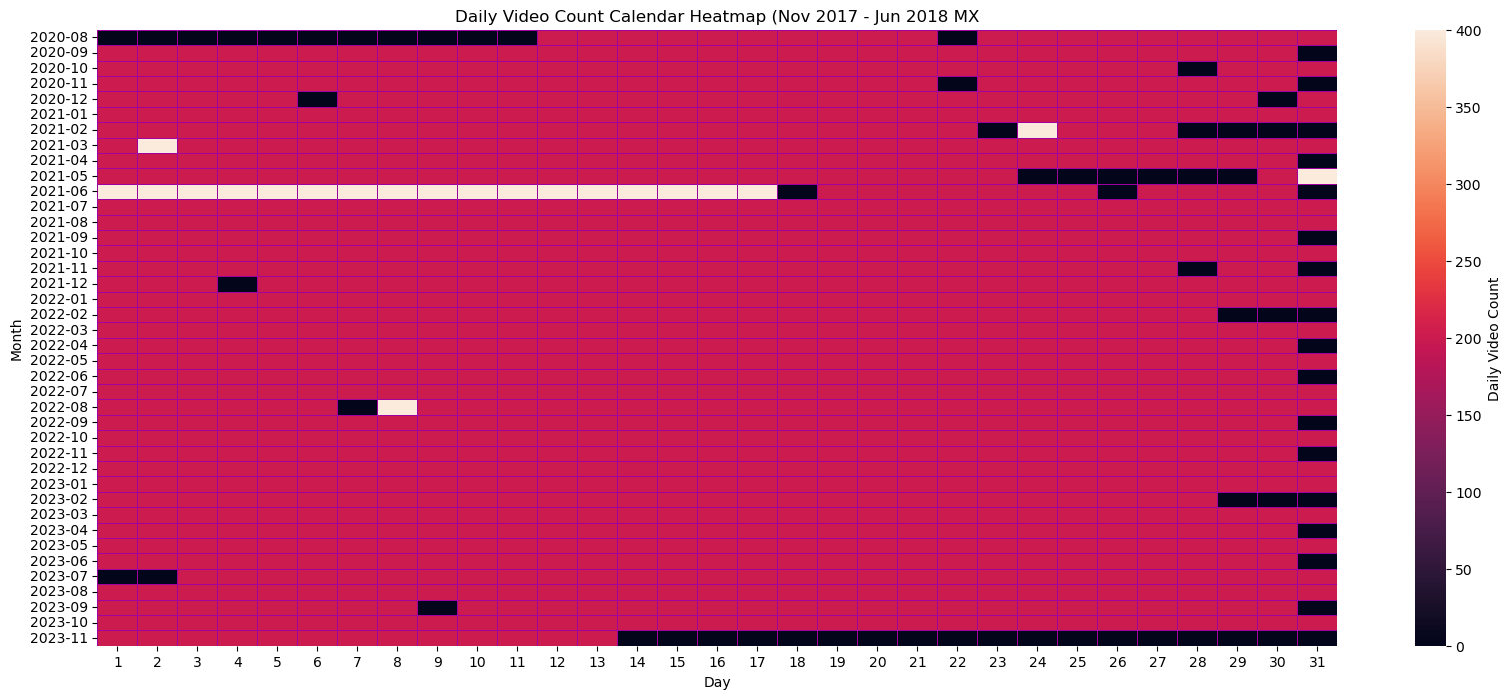

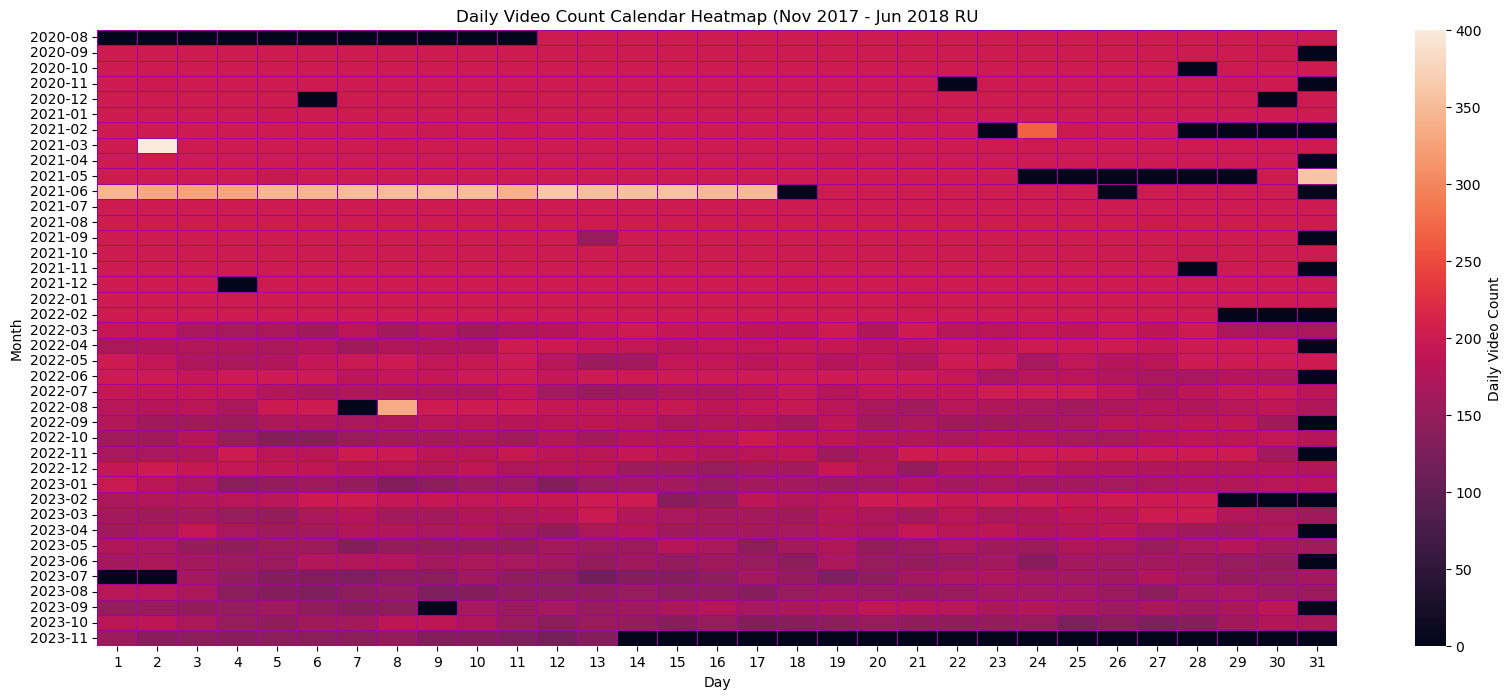

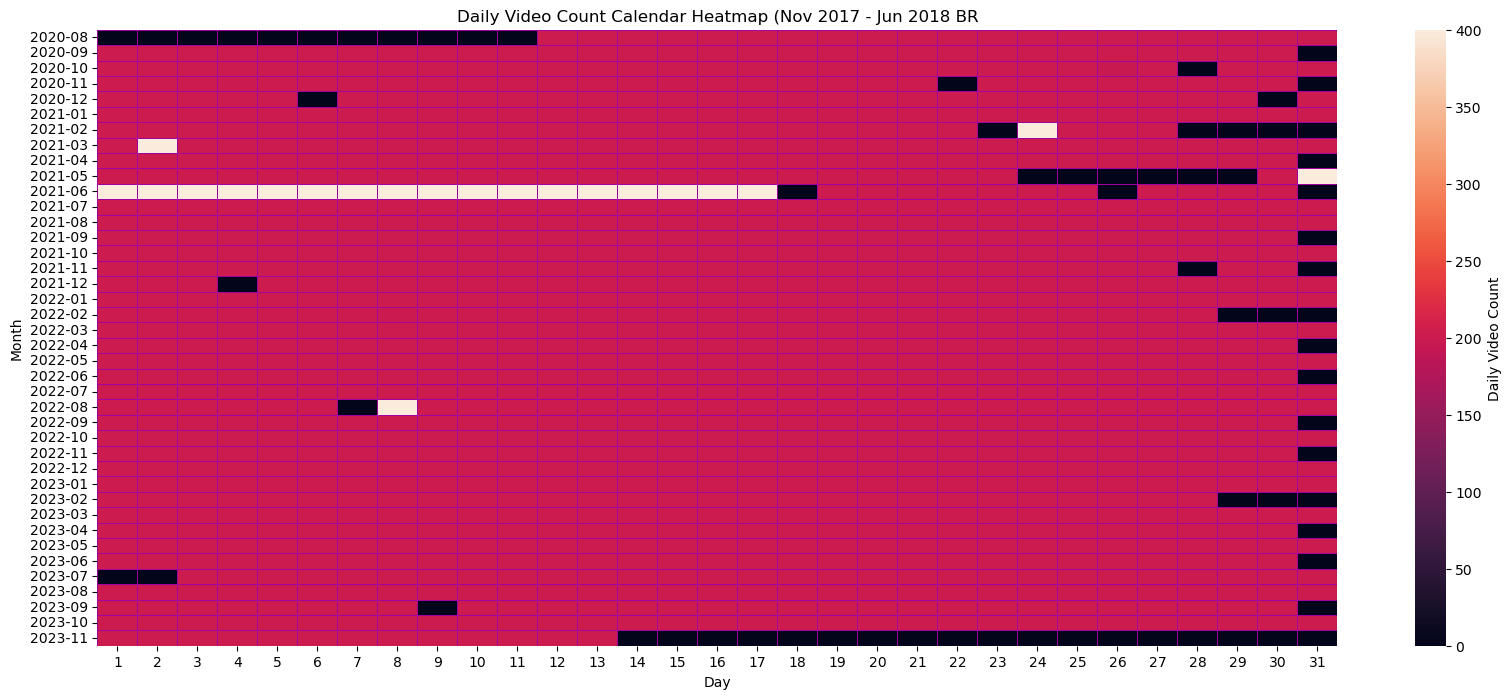

In [9]:
countries = ['US', 'CA', 'DE', 'GB', 'FR', 'IN', 'JP', 'KR', 'MX', 'RU', 'BR']
for c in countries:
    country_data = df_full[df_full['country']== c]
    series_data = country_data.groupby('trending_date').size()
    series_data = series_data.reindex(all_dates).fillna(0)

    # Reshape the data for the heatmap
    df_heatmap = series_data.reset_index()
    df_heatmap['month'] = df_heatmap['index'].dt.strftime('%Y-%m')
    df_heatmap['day'] = df_heatmap['index'].dt.day

    heatmap_data = df_heatmap.pivot_table(values=0, index='month', columns='day', fill_value=0)

    # Plotting the heatmap
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(heatmap_data, cbar_kws={'label': 'Daily Video Count'},linewidths=.5,linecolor='#A000A0')
    ax.set_title('Daily Video Count')
    cbar = ax.collections[0].colorbar
    cbar.set_label(label= 'Daily Video Count')
    ax.set_xlabel('Day')
    ax.set_ylabel('Month')
    ax.set_title('Daily Video Count Calendar Heatmap (Nov 2017 - Jun 2018 ' + c)
    plt.show()

# Q3. When were videos published?

In [17]:
df_full['publish_hour'] = df_full['publishedAt'].astype(str).str.split(':').str[0].astype(int)
repeat_vids = df_full.groupby(['publish_hour'])['category'].value_counts().reset_index(name='count_cate')
repeat_vids = repeat_vids.rename(columns={'category':'Category Title'})
repeat_vids = repeat_vids.rename(columns={'publish_hour':'Hour of the day'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Hour of the day', columns='Category Title', values='count_cate', aggfunc='sum').fillna(0)
# Melt the dataframe for plotly
df_melted = repeat_vids_pivot_data.reset_index().melt(id_vars='Hour of the day', value_name='Count')

# Plotting with plotly
fig = px.bar(df_melted, x='Hour of the day', y='Count', color='Category Title',
            #  title='Category Distribution by Number of Trending Days',
             labels={'Count': 'Number of videos published per hour', 'Hour of the day': 'Hour of the day (24-hour format)'},
             hover_data=['Category Title', 'Count'])

fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Number of videos published per hour by category',
    title_font_color = '#b4abb8',
    # xaxis_title='Month-Year',
    xaxis_title_font_color = '#b4abb8',
    xaxis=dict(linecolor='#000000'),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = '#b4abb8',
    font_color= '#b4abb8',
    plot_bgcolor='#000000',
    paper_bgcolor = '#000000',
)
fig.show()

# Q4.as there a relationship between title length and views?

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_5122/2714544630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


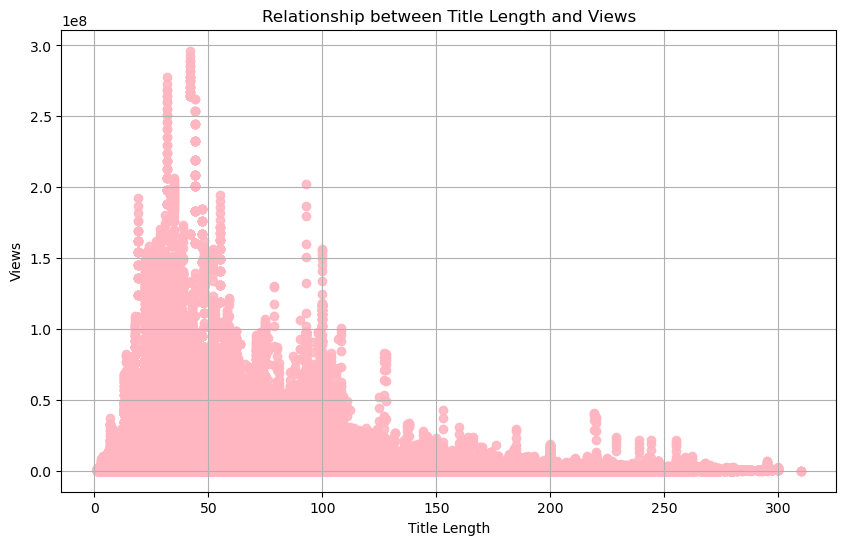

In [12]:
title_length_v_views = df_full[['title','view_count']]
# Calculate the length of each title and store it in a new column 'title_length'
title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)
x = title_length_v_views['title_length']
y = title_length_v_views['view_count']

# Create a scatter plot to visualize the relationship between title length and views
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.scatter(x, y, alpha=0.9, color='#FFB6C1')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Relationship between Title Length and Views')
plt.grid(True)
plt.show()

There is no linear relationship between title length and views

English Countries

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_5122/380788690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


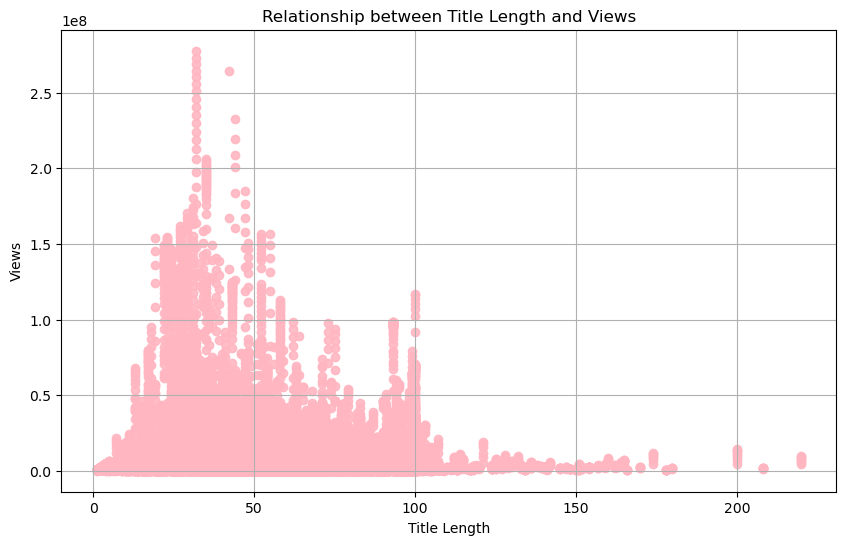

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_5122/380788690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


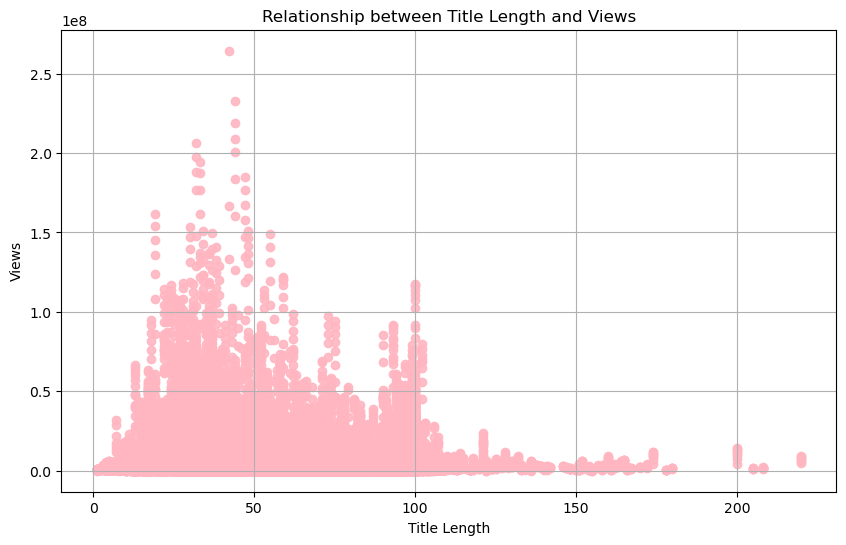

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_5122/380788690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


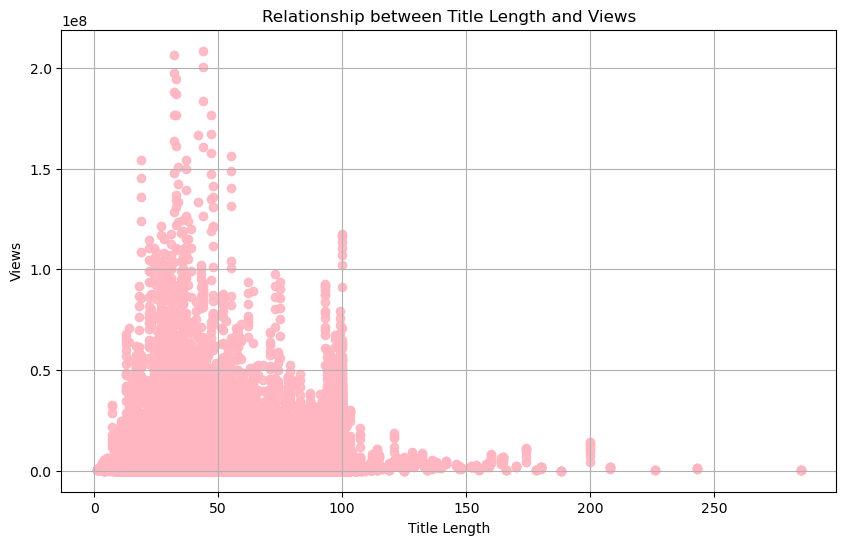

In [13]:
for c in ['US', 'CA', 'GB']:
    country_data = df_full[df_full['country']== c]
    title_length_v_views = country_data[['title','view_count']]
    # Calculate the length of each title and store it in a new column 'title_length'
    title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)
    x = title_length_v_views['title_length']
    y = title_length_v_views['view_count']

    # Create a scatter plot to visualize the relationship between title length and views
    plt.figure(figsize=(10, 6))  # Adjust the figure size

    plt.scatter(x, y, alpha=0.9, color='#FFB6C1')
    plt.xlabel('Title Length')
    plt.ylabel('Views')
    plt.title('Relationship between Title Length and Views')
    plt.grid(True)
    plt.show()